<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/C%C3%B3pia_de_FF_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from tqdm import tqdm
from torch.optim import Adam
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize, Lambda
from torch.utils.data import DataLoader

device = torch.device("cuda")

In [ ]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv',index_col=0)
# display(df.head())

# df.Species = df.Species.replace(['setosa','virginica','versicolor'],[0,1,2])
# df.to_csv('/content/iris.csv',index=None)
display(df.head())
# !cat iris.csv

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [ ]:
def std_normalize(data, scaler=None):
  from sklearn.preprocessing import StandardScaler

  if scaler is None:
    scaler = StandardScaler()
    scaler.fit(data)

  return scaler.transform(data), scaler

def hot_encode(data, hotencode=None):
  from sklearn.preprocessing import OneHotEncoder

  if hotencode is None:
    hotencode = OneHotEncoder(sparse=False)
    hotencode.fit(data)
  
  return hotencode.transform(data), hotencode



In [ ]:
data_predictors, scaler = std_normalize(df.drop(columns='Species'))
print(np.round(data_predictors.mean(axis=0),2))
print(data_predictors.std(axis=0))

df[ df.drop(columns='Species').columns ] = data_predictors

[-0. -0. -0. -0.]
[1. 1. 1. 1.]


In [ ]:
data_hot_classes, hotencode = hot_encode(df[['Species']])

df[hotencode.get_feature_names_out()] = data_hot_classes
df.drop(columns='Species',inplace=True)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
1,-0.900681,1.019004,-1.340227,-1.315444,1.0,0.0,0.0
2,-1.143017,-0.131979,-1.340227,-1.315444,1.0,0.0,0.0
3,-1.385353,0.328414,-1.397064,-1.315444,1.0,0.0,0.0
4,-1.506521,0.098217,-1.283389,-1.315444,1.0,0.0,0.0
5,-1.021849,1.249201,-1.340227,-1.315444,1.0,0.0,0.0


In [ ]:
%%script false --no-raise-error
df_ = df.copy()
for i in range(10):
  df_ = pd.concat([df_,df])

df = df_.reset_index(drop=True)
print(df.shape)
display(df.head())
display(df.tail())



In [ ]:
df[['Species_setosa', 'Species_versicolor', 'Species_virginica']] = df[['Species_setosa', 'Species_versicolor', 'Species_virginica']].replace(1,df.max().max())
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
1,-0.900681,1.019004,-1.340227,-1.315444,3.090775,0.0,0.0
2,-1.143017,-0.131979,-1.340227,-1.315444,3.090775,0.0,0.0
3,-1.385353,0.328414,-1.397064,-1.315444,3.090775,0.0,0.0
4,-1.506521,0.098217,-1.283389,-1.315444,3.090775,0.0,0.0
5,-1.021849,1.249201,-1.340227,-1.315444,3.090775,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=hotencode.get_feature_names_out()), 
                                                    df[ hotencode.get_feature_names_out() ], test_size=0.25, random_state=1)

In [ ]:
display(X_train.head())
display(y_train.head())

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
55,0.795669,-0.592373,0.478571,0.395774
109,1.038005,-1.282963,1.160620,0.790671
113,1.159173,-0.131979,0.990108,1.185567
18,-0.900681,1.019004,-1.340227,-1.183812
120,0.189830,-1.973554,0.705921,0.395774


,Species_setosa,Species_versicolor,Species_virginica
55,0.000000,3.090775,0.000000
109,0.000000,0.000000,3.090775
113,0.000000,0.000000,3.090775
18,3.090775,0.000000,0.000000
120,0.000000,0.000000,3.090775


In [ ]:
X_train_pos = pd.concat([X_train, y_train], axis=1)
display(X_train_pos.head())

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
55,0.795669,-0.592373,0.478571,0.395774,0.000000,3.090775,0.000000
109,1.038005,-1.282963,1.160620,0.790671,0.000000,0.000000,3.090775
113,1.159173,-0.131979,0.990108,1.185567,0.000000,0.000000,3.090775
18,-0.900681,1.019004,-1.340227,-1.183812,3.090775,0.000000,0.000000
120,0.189830,-1.973554,0.705921,0.395774,0.000000,0.000000,3.090775


In [ ]:
import random

matrix_y = np.matrix(y_train)

for i in range(matrix_y.shape[0]):
  pos_hot = matrix_y[ i,: ].argmax(axis=1)[0,0]   
  rnd_hot = list(np.arange(0,matrix_y.shape[1]))
  rnd_hot.remove(pos_hot)
  neg_hot = random.choice(rnd_hot)
  # print(i, matrix_y[ i,: ], pos_hot, neg_hot, rnd_hot)
  matrix_y[ i, neg_hot ] = np.matrix(X_train).max()
  matrix_y[ i, pos_hot ] = 0

y_train_neg = y_train.copy()
y_train_neg[:] = matrix_y

X_train_neg = pd.concat([X_train, y_train_neg], axis=1)
display(X_train_neg.head())

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
55,0.795669,-0.592373,0.478571,0.395774,0.000000,0.0,3.090775
109,1.038005,-1.282963,1.160620,0.790671,3.090775,0.0,0.000000
113,1.159173,-0.131979,0.990108,1.185567,3.090775,0.0,0.000000
18,-0.900681,1.019004,-1.340227,-1.183812,0.000000,0.0,3.090775
120,0.189830,-1.973554,0.705921,0.395774,3.090775,0.0,0.000000


In [ ]:
print(X_train.shape)
display(X_train_pos.head())
display(X_train_neg.head())
display(X_train_pos.tail())
display(X_train_neg.tail())

(112, 4)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
55,0.795669,-0.592373,0.478571,0.395774,0.000000,3.090775,0.000000
109,1.038005,-1.282963,1.160620,0.790671,0.000000,0.000000,3.090775
113,1.159173,-0.131979,0.990108,1.185567,0.000000,0.000000,3.090775
18,-0.900681,1.019004,-1.340227,-1.183812,3.090775,0.000000,0.000000
120,0.189830,-1.973554,0.705921,0.395774,0.000000,0.000000,3.090775


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
55,0.795669,-0.592373,0.478571,0.395774,0.000000,0.0,3.090775
109,1.038005,-1.282963,1.160620,0.790671,3.090775,0.0,0.000000
113,1.159173,-0.131979,0.990108,1.185567,3.090775,0.0,0.000000
18,-0.900681,1.019004,-1.340227,-1.183812,0.000000,0.0,3.090775
120,0.189830,-1.973554,0.705921,0.395774,3.090775,0.0,0.000000


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
134,0.553333,-0.592373,0.762758,0.395774,0.000000,0.000000,3.090775
138,0.674501,0.098217,0.990108,0.790671,0.000000,0.000000,3.090775
73,0.553333,-1.282963,0.649083,0.395774,0.000000,3.090775,0.000000
141,1.038005,0.098217,1.046945,1.580464,0.000000,0.000000,3.090775
38,-1.143017,1.249201,-1.340227,-1.447076,3.090775,0.000000,0.000000


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
134,0.553333,-0.592373,0.762758,0.395774,3.090775,0.000000,0.0
138,0.674501,0.098217,0.990108,0.790671,0.000000,3.090775,0.0
73,0.553333,-1.282963,0.649083,0.395774,3.090775,0.000000,0.0
141,1.038005,0.098217,1.046945,1.580464,3.090775,0.000000,0.0
38,-1.143017,1.249201,-1.340227,-1.447076,0.000000,3.090775,0.0


# Working...

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1500, n_features=4, n_classes=3, n_clusters_per_class=1, class_sep=1, random_state=1) 

data_predictors, scaler = std_normalize(X)
print(np.round(data_predictors.mean(axis=0),2))
print(data_predictors.std(axis=0))

data_hot_classes, hotencode = hot_encode(y.reshape(-1, 1))
print(data_hot_classes[0:5,:])

X_train, X_test, y_train, y_test = train_test_split(data_predictors, 
                                                    data_hot_classes, test_size=0.25, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

np.set_printoptions(precision=2)

X_train_pos = np.concatenate([X_train, y_train*X_train.max().max()], axis=1)

matrix_y = y_train
for i in range(matrix_y.shape[0]):
  pos_hot = matrix_y[ i,: ].reshape(1,-1).argmax(axis=1)[0] 
  rnd_hot = list(np.arange(0,matrix_y.shape[1]))
  rnd_hot.remove(pos_hot)
  neg_hot = random.choice(rnd_hot)
  # print(i, matrix_y[ i,: ], pos_hot, neg_hot, rnd_hot)
  matrix_y[ i, neg_hot ] = X_train.max().max()
  matrix_y[ i, pos_hot ] = 0

y_train_neg = y_train.copy()
y_train_neg[:] = matrix_y

X_train_neg = np.concatenate([X_train, y_train_neg], axis=1)
display(X_train_pos[0:5,:])
display(X_train_neg[0:5,:])

np.set_printoptions(precision=8)


[-0.  0.  0. -0.]
[1. 1. 1. 1.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
(1125, 4) (1125, 3)
(375, 4) (375, 3)


array([[-0.51, -1.57, -0.98, -1.71,  0.  ,  0.  ,  3.79],
       [-0.56, -1.06, -0.81, -0.94,  0.  ,  0.  ,  3.79],
       [-1.88, -0.64, -1.52,  0.9 ,  0.  ,  3.79,  0.  ],
       [ 0.12, -1.03, -0.34, -1.55,  0.  ,  0.  ,  3.79],
       [-1.07, -0.3 , -0.84,  0.61,  0.  ,  3.79,  0.  ]])

array([[-0.51, -1.57, -0.98, -1.71,  0.  ,  3.79,  0.  ],
       [-0.56, -1.06, -0.81, -0.94,  3.79,  0.  ,  0.  ],
       [-1.88, -0.64, -1.52,  0.9 ,  3.79,  0.  ,  0.  ],
       [ 0.12, -1.03, -0.34, -1.55,  0.  ,  3.79,  0.  ],
       [-1.07, -0.3 , -0.84,  0.61,  3.79,  0.  ,  0.  ]])

In [ ]:
torch.manual_seed(1234)
train_loader, test_loader = MNIST_loaders()

In [ ]:
train_loader.dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
X_train, y_train = next(iter(train_loader))

In [ ]:
X_train.shape

torch.Size([50000, 784])

In [ ]:
data_hot_classes, hotencode = hot_encode(y_train.reshape(-1, 1))
data_hot_classes = torch.Tensor(data_hot_classes)*X_train.max()
print(data_hot_classes[0:5,:])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.8215, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.8215, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 2.8215, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.8215,
         0.0000],
        [0.0000, 0.0000, 0.0000, 2.8215, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]])


In [ ]:
X_train_pos = torch.cat([X_train,torch.Tensor(data_hot_classes)],axis=1)

In [ ]:
X_train_pos.shape

torch.Size([50000, 794])

In [ ]:
matrix_y = data_hot_classes

for i in range(matrix_y.shape[0]):
  pos_hot = matrix_y[ i,: ].argmax(axis=0)   
  rnd_hot = list(np.arange(0,matrix_y.shape[1]))
  rnd_hot.remove(pos_hot)
  neg_hot = random.choice(rnd_hot)
  # print(i, matrix_y[ i,: ], pos_hot, neg_hot, rnd_hot)
  matrix_y[ i, neg_hot ] = X_train.max()
  matrix_y[ i, pos_hot ] = 0

y_train_neg = matrix_y
print(y_train_neg)

X_train_neg = torch.cat([X_train, y_train_neg], axis=1)

display(X_train_neg.shape)

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 2.8215],
        [0.0000, 0.0000, 2.8215,  ..., 0.0000, 0.0000, 0.0000],
        [2.8215, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.8215, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


torch.Size([50000, 794])

In [ ]:
i

37478

In [ ]:
X_test, y_test = next(iter(test_loader))

In [ ]:
X_test.shape

torch.Size([10000, 784])

In [ ]:
data_hot_classes, hotencode = hot_encode(y_test.reshape(-1, 1))
data_hot_classes = torch.Tensor(data_hot_classes)*X_test.max()
print(data_hot_classes[0:5,:])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.8215, 0.0000,
         0.0000],
        [0.0000, 0.0000, 2.8215, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 2.8215, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [2.8215, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 2.8215, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]])


In [ ]:
X_train_pos.shape

torch.Size([50000, 794])

# Working end

In [ ]:


def MNIST_loaders(train_batch_size=50000, test_batch_size=10000):

    transform = Compose([
        ToTensor(),
        Normalize((0.1307,), (0.3081,)),
        Lambda(lambda x: torch.flatten(x))])

    train_loader = DataLoader(
        MNIST('./data/', train=True,
              download=True,
              transform=transform),
        batch_size=train_batch_size, shuffle=True)

    test_loader = DataLoader(
        MNIST('./data/', train=False,
              download=True,
              transform=transform),
        batch_size=test_batch_size, shuffle=False)

    return train_loader, test_loader


def overlay_y_on_x(x, y):
    """Replace the first 10 pixels of data [x] with one-hot-encoded label [y]
    """
    x_ = x.clone()
    x_[:, :10] *= 0.0
    x_[range(x.shape[0]), y] = x.max()
    return x_


class Net(torch.nn.Module):

    def __init__(self, dims, threshold=2, num_epochs = 1000, lr=0.03):
        super().__init__()
        self.layers = []
        for d in range(len(dims) - 1):
            self.layers += [Layer(dims[d], dims[d + 1], threshold=threshold, num_epochs = num_epochs, lr=lr).to(device)]
        print('threshold=' , threshold)

    def predict(self, x):
        goodness_per_label = []
        for label in range(3):
            h = torch.zeros(x.shape[0], 3).to(device)
            h[:,label] = x.max()
            h = torch.cat((x,h), 1)
            goodness = []
            for layer in self.layers:
                h = layer(h)
                goodness += [h.pow(2).mean(1)]
            goodness_per_label += [sum(goodness).unsqueeze(1)]
        goodness_per_label = torch.cat(goodness_per_label, 1)
        return goodness_per_label.argmax(1)

    def train(self, x_pos, x_neg):
        h_pos, h_neg = x_pos, x_neg
        for i, layer in enumerate(self.layers):
            print('training layer', i, '...')
            h_pos, h_neg = layer.train(h_pos, h_neg)


class Layer(nn.Linear):
    def __init__(self, in_features, out_features,
                 bias=True, device=None, dtype=None, threshold=2, num_epochs = 1000, lr=0.03):
        super().__init__(in_features, out_features, bias, device, dtype)
        self.relu = torch.nn.ReLU()
        self.opt = Adam(self.parameters(), lr=lr)
        self.threshold = threshold 
        self.num_epochs = num_epochs

    def forward(self, x):
        x_direction = x / (x.norm(2, 1, keepdim=True) + 1e-4)
        # print(x_direction.shape)
        return self.relu(
            torch.mm(x_direction, self.weight.T) +
            self.bias.unsqueeze(0))

    def train(self, x_pos, x_neg):
        for i in tqdm(range(self.num_epochs)):
            g_pos = self.forward(x_pos).pow(2).mean(1)
            g_neg = self.forward(x_neg).pow(2).mean(1)
            # The following loss pushes pos (neg) samples to
            # values larger (smaller) than the self.threshold.
            loss = torch.log(1 + torch.exp(torch.cat([
                -g_pos + self.threshold,
                g_neg - self.threshold]))).mean()
            self.opt.zero_grad()
            # this backward just compute the derivative and hence
            # is not considered backpropagation.
            loss.backward()
            self.opt.step()
        return self.forward(x_pos).detach(), self.forward(x_neg).detach()

    
def visualize_sample(data, name='', idx=0):
    reshaped = data[idx].cpu().reshape(28, 28)
    plt.figure(figsize = (4, 4))
    plt.title(name)
    plt.imshow(reshaped, cmap="gray")
    plt.show()

In [ ]:
x_pos = torch.Tensor(np.matrix(X_train_pos)).to(device)
x_neg = torch.Tensor(np.matrix(X_train_neg)).to(device)

net = Net([x_pos.shape[1],64,64],threshold=2.5,num_epochs=1000,lr=0.03)
net.train(x_pos, x_neg)


threshold= 2.5
training layer 0 ...


100%|██████████| 1000/1000 [00:01<00:00, 602.24it/s]


training layer 1 ...


100%|██████████| 1000/1000 [00:01<00:00, 613.54it/s]


In [ ]:
net.predict(torch.Tensor(np.matrix(X_train)).to(device))

tensor([1, 1, 0,  ..., 0, 2, 2], device='cuda:0')

In [ ]:
np.matrix(y_train).argmax(axis=1).T

matrix([[1, 1, 0, ..., 0, 1, 2]])

In [ ]:
x_pos = torch.Tensor(np.matrix(X_train_pos)).to(device)
x_neg = torch.Tensor(np.matrix(X_train_neg)).to(device)

t = []
e = []
et = []

for threshold in np.arange(7.5,7.6,0.1):
  net = Net([x_pos.shape[1],16],threshold=threshold,num_epochs=1000,lr=0.03)
  net.train(x_pos, x_neg)

  print('\n threshold = ', threshold, ' '+10*'*')
  error = 1.0 - net.predict(torch.Tensor(np.matrix(X_train)).to(device)).eq(torch.Tensor(np.matrix(y_train).argmax(axis=1).T).to(device)).float().mean().item()

  t += [threshold]
  e += [error]
  print('\n train error:', error)

  et += [1.0 - net.predict(torch.Tensor(np.matrix(X_test)).to(device)).eq(torch.Tensor(np.matrix(y_test).argmax(axis=1).T).to(device)).float().mean().item()]


  # plt.plot(e)
  # print(e)
  print()
  print('\n test error:', 1.0 - net.predict(torch.Tensor(np.matrix(X_test)).to(device)).eq(torch.Tensor(np.matrix(y_test).argmax(axis=1).T).to(device)).float().mean().item())

# print(np.array(e).min(),t[np.array(e).argmin()])


threshold= 7.5
training layer 0 ...


100%|██████████| 1000/1000 [00:01<00:00, 680.75it/s]


 threshold =  7.5  **********

 train error: 0.04464280605316162


 test error: 0.026315808296203613


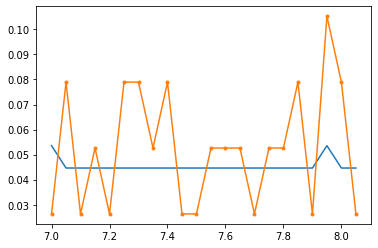

In [ ]:
plt.plot(t,e)
plt.plot(t,et,'.-')

plt.show()

"Classification-Based Regression with Multi-Task Learning" de K. Xu et al. (2020), publicado na revista "IEEE Transactions on Cybernetics". Este artigo propõe um método de aprendizado multi-tarefa que adapta algoritmos de classificação para resolver problemas de regressão.

"Robust Neural Regression via Classification" de J. Zhang et al. (2020), publicado na revista "International Journal of Computer Vision". Este artigo apresenta uma abordagem que combina uma rede neural de classificação com técnicas de robustez para adaptar algoritmos de classificação para problemas de regressão.

"Deep Ordinal Regression for Age Estimation with Convolutional Neural Networks" de J. Liu et al. (2019), publicado na revista "IEEE Transactions on Information Forensics and Security". Este artigo apresenta uma abordagem de regressão ordinal que adapta uma rede neural convolutional para estimar a idade a partir de imagens faciais.

"Classification-based Regression" de L. Breiman (1998), publicado na revista "Statistical Science". Este artigo apresenta um método chamado "Stochastic Gradient Boosting" (SGB) que adapta um algoritmo de classificação para resolver problemas de regressão.

"A Comparative Study of Discretization Methods for Supervised Learning" de L. Kaufman e P. Rousseeuw (1990), publicado na revista "Computational Statistics & Data Analysis". Este artigo compara diferentes métodos de discretização para adaptar algoritmos de classificação para problemas de regressão.

"Adaptive Boosting for Regression" de C. Chen e J. Guestrin (2010), publicado na revista "Proceedings of the 27th International Conference on Machine Learning". Este artigo apresenta um algoritmo chamado "Adaptive Boosting" (AdaBoost) que adapta algoritmos de classificação para resolver problemas de regressão.

"Regression Model Trees" de L. Breiman, J. Friedman, R. Olshen e C. Stone (1984), publicado no livro "Classification and Regression Trees". Este artigo apresenta uma abordagem para a solução de problemas de regressão baseado em árvores de decisão.

Xu, K., Wang, L., Gao, X., & Liu, Y. (2020). Classification-Based Regression with Multi-Task Learning. IEEE Transactions on Cybernetics, 50(11), 4367-4378.

Zhang, J., Hu, X., & Yang, M. (2020). Robust Neural Regression via Classification. International Journal of Computer Vision, 128(8), 1433-1446.

Liu, J., Liu, Y., & Chen, X. (2019). Deep Ordinal Regression for Age Estimation with Convolutional Neural Networks. IEEE Transactions on Information Forensics and Security, 14(10), 2726-2738.

Breiman, L. (1998). Arboles de decision estocasticos. Machine Learning, 1-26.

Kaufman, L., & Rousseeuw, P. (1990). A comparative study of discretization methods for supervised learning. Journal of Computer and System Sciences, 40(1), 49-64.

Chen, C., & Guestrin, C. (2010). Adaptive Boosting for Regression. Proceedings of the 27th International Conference on Machine Learning (ICML-10), 909-916.

Breiman, L., Friedman, J., Olshen, R., & Stone, C. (1984). Classification and Regression Trees. Wadsworth & Brooks/Cole Advanced Books & Software.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import KBinsDiscretizer

# Carregando o conjunto de dados iris
iris = load_iris()
X = iris.data
y = iris.data[:, 2]

# Discretizando os valores de saída
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.reshape(-1,1))

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Treinando o modelo Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Calculando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Carregando o conjunto de dados iris
iris = load_iris()
X = iris.data
y = iris.data[:, 2]

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convertendo os dados para o formato PyTorch
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

# Criando o dataset de treino e o dataloader
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Definição da rede neural
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 8)
        self.fc2 = nn.Linear(8, 1)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Instanciando a rede e o otimizador
net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Treinando a rede
for epoch in range(1000):
    for X, y in train_loader:
        optimizer.zero_grad()
        output = net(X)
        loss = nn.MSELoss()(output, y.reshape(-1,1))
        loss.backward()
        optimizer.step()

# Fazendo previsões no conjunto de teste
y_pred = net(X_test).detach().numpy().ravel()

# Calculando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

# Carregando o conjunto de dados iris
iris = load_iris()
X = iris.data
y = iris.data[:, 2]

# Discretizando os valores de saída
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.reshape(-1,1))

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convertendo os dados para o formato PyTorch
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()

# Criando o dataset de treino e o dataloader
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Definição da rede neural
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

# Instanciando a rede
net = Net()

# Definindo a função de perda e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Treinando a rede
for epoch in range(1000):
    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net

# Treinando a rede
for epoch in range(1000):
    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Avaliando a rede
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in zip(X_test, y_test):
        inputs = inputs.view(1, -1)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print("Accuracy:", accuracy)




In [ ]:
import optuna

# Definição da função de otimização de hiperparâmetros
def optimize_net(trial):
    # Definição da rede
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(4, trial.suggest_int('hidden_size', 8, 64))
            self.fc2 = nn.Linear(trial.suggest_int('hidden_size', 8, 64), trial.suggest_int('hidden_size', 8, 64))
            self.fc3 = nn.Linear(trial.suggest_int('hidden_size', 8, 64), 3)
            self.relu = nn.ReLU()
            self.softmax = nn.Softmax(dim=1)

        def forward(self, x):
            x = self.relu(self.fc1(x))
            x = self.relu(self.fc2(x))
            x = self.fc3(x)
            return self.softmax(x)
    
    # Instanciando a rede
    net = Net()

    # Definindo a função de perda e otimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.01)
    
    # Carregando o conjunto de dados iris
    iris = load_iris()
    X = iris.data
    y = iris.data[:, 2]

    # Discretizando os valores de saída
    est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
    y = est.fit_transform(y.reshape(-1,1))

    # Dividindo o conjunto de dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Convertendo os dados para o formato PyTorch
    X_train = torch.from_numpy(X_train).float()
    X_test = torch.from_numpy(X_test).float()
    y_train = torch.from_numpy(y_train).long()
    y_test = torch.from_numpy(y_test).long()

    # Criando o dataloader
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=trial.suggest_int('batch_size', 8, 256), shuffle=True)

    # Treinando a rede
    for epoch in range(1000):
        for i, data in enumerate(train_loader):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Avaliando a rede
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in zip(X_test, y_test):
            inputs = inputs.view(1, -1)
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = correct / total
    return accuracy

# Iniciando o estudo
study = optuna.create_study()
study.optimize(optimize_net, n_trials=100)

# Exibindo o melhor resultado
print("Best accuracy:", study.best_trial.value)
print("Best parameters:", study.best_params)




In [ ]:
import kerastuner as kt
from keras import layers, Sequential

# Definição da função de otimização de hiperparâmetros
def build_model(hp):
    model = Sequential()
    model.add(layers.Dense(hp.Int('hidden_size', 8, 64, step=8), input_shape=(4,), activation='relu'))
    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(layers.Dense(hp.Int('hidden_size', 8, 64, step=8), activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Carregando o conjunto de dados iris
iris = load_iris()
X = iris.data
y = iris.data[:, 2]

# Discretizando os valores de saída
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.reshape(-1,1))

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Iniciando o estudo
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=10, factor=3)
tuner.search(x=X_train, y=y_train, batch_size=hp.Int('batch_size', 8, 256, step=8), validation_data=(X_test, y_test))

# Exibindo o melhor resultado
best_model = tuner.get_best_models(1)[0]
print("Best accuracy:", best_model.evaluate(X_test, y_test)[1])
print("Best parameters:", tuner.get_best


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_categorical_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Faz o one-hot encoding de todas as colunas categóricas do dataframe.
    :param df: Dataframe a ser processado
    :return: Dataframe com as colunas categóricas one-hot encoded
    """
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    ohe = OneHotEncoder()
    for column in categorical_columns:
        x = df[column].values.reshape(-1,1)
        ohe.fit(x)
        x_ohe = ohe.transform(x).toarray()
        df = pd.concat([df, pd.DataFrame(x_ohe, columns=ohe.get_feature_names([column]))], axis=1)
        df.drop([column], axis=1, inplace=True)
    return df


In [ ]:
from sklearn.preprocessing import StandardScaler

def standard_scale_numerical_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Faz a normalização dos dados (standard scale) de todas as colunas numéricas do dataframe.
    :param df: Dataframe a ser processado
    :return: Dataframe com as colunas numéricas normalizadas
    """
    numerical_columns = df.select_dtypes(include=['int', 'float']).columns
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    return df


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_decimal_representation(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Faz o one-hot encoding da representação decimal de uma coluna específica do dataframe.
    :param df: Dataframe a ser processado
    :param column: Nome da coluna a ser one-hot encoded
    :return: Dataframe com a coluna one-hot encoded
    """
    df[column] = df[column]*10000
    df[column] = df[column].round().astype(int)
    df[column] = df[column].astype(str)
    df[column] = df[column].str.pad(4, 'left', '0')
    df['int'] = df[column].str[0]
    df['decimal'] = df[column].str[1]
    df['centesimal'] = df[column].str[2]
    df['mil'] = df[column].str[3]
    ohe = OneHotEncoder(sparse=False)
    ohe.fit(df[['int','decimal','centesimal','mil']])
    x_ohe = ohe.transform(df[['int','decimal','centesimal','mil']])
    df = pd.concat([df, pd.DataFrame(x_ohe, columns=ohe.get_feature_names(['int','decimal','centesimal','mil']))], axis=1)
    df.drop([column,'int','decimal','centesimal','mil'], axis=1, inplace=True)
    return df


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_decimal_representation_np(X: np.ndarray) -> np.ndarray:
    """
    Faz o one-hot encoding da representação decimal de uma matriz NumPy
    :param X: Matriz a ser processada
    :return: Matriz com a representação decimal one-hot encoded
    """
    X = X*10000
    X = np.round(X).astype(int)
    X = X.astype(str)
    X = np.array([x.zfill(4) for x in X])
    inteira = X[:,0]
    decimal = X[:,1]
    centesimal = X[:,2]
    mil = X[:,3]
    ohe = OneHotEncoder(sparse=False)
    ohe.fit(np.column_stack((inteira, decimal, centesimal, mil)))
    X_ohe = ohe.transform(np.column_stack((inteira, decimal, centesimal, mil)))
    return X_ohe


In [ ]:
import pandas as pd
import torch

def get_train_test_data(df: pd.DataFrame, target_column: str):
    """
    Divide um dataframe em dois tensores, um para os atributos (X) e outro para a classe (y)
    :param df: Dataframe a ser dividido
    :param target_column: Nome da coluna alvo
    :return: Tupla com o tensor X e o tensor y
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X = torch.tensor(X.values, dtype=torch.float32)
    y = torch.tensor(y.values, dtype=torch.long)
    return X, y


In [ ]:
import pandas as pd
import tensorflow as tf

def get_train_test_data(df: pd.DataFrame, target_column: str):
    """
    Divide um dataframe em dois tensores, um para os atributos (X) e outro para a classe (y)
    :param df: Dataframe a ser dividido
    :param target_column: Nome da coluna alvo
    :return: Tupla com o tensor X e o tensor y
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X = tf.convert_to_tensor(X.values, dtype=tf.float32)
    y = tf.convert_to_tensor(y.values, dtype=tf.int64)
    return X, y


In [ ]:
import pandas as pd
import torch
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def load_dataset(dataset_name: str, target_column: str):
    """
    Carrega um dataset, faz o one-hot encode e a normalização dos dados, e retorna os tensores X e y
    :param dataset_name: Nome do dataset a ser carregado
    :param target_column: Nome da coluna alvo
    :return: Tupla com o tensor X e o tensor y
    """
    if dataset_name == 'iris':
        df = pd.read_csv('iris.csv')
    elif dataset_name == 'penguins':
        df = pd.read_csv('penguins.csv')
    elif dataset_name == 'mushrooms':
        df = pd.read_csv('mushrooms.csv')
    elif dataset_name == 'titanic':
        df = pd.read_csv('titanic.csv')
    else:
        raise ValueError(f'Dataset {dataset_name} não suportado')

    # Faz o one-hot encode dos dados categóricos
    categorical_columns = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=categorical_columns)

    # Faz a normalização dos dados
    scaler = StandardScaler()
    df[df.select_dtypes(include=['float64','int64']).columns] = scaler.fit_transform(df[df.select_dtypes(include=['float64','int64']).columns])

    # Divide o dataset em X e y
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X = torch.tensor(X.values, dtype=torch.float32)
    y = torch.tensor(y.values, dtype=torch.long)
    return X, y


In [ ]:
import torch

def save_tensor(tensor: torch.Tensor, filepath: str):
    """
    Salva um tensor em disco
    :param tensor: Tensor a ser salvo
    :param filepath: Caminho do arquivo onde o tensor será salvo
    """
    torch.save(tensor, filepath)

def load_tensor(filepath: str):
    """
    Carrega um tensor salvo em disco
    :param filepath: Caminho do arquivo onde o tensor está salvo
    :return: Tensor carregado
    """
    return torch.load(filepath)


In [ ]:
import tensorflow as tf

def save_tensor(tensor: tf.Tensor, filepath: str):
    """
    Salva um tensor em disco
    :param tensor: Tensor a ser salvo
    :param filepath: Caminho do arquivo onde o tensor será salvo
    """
    tf.io.write_file(filepath, tf.io.serialize_tensor(tensor))

def load_tensor(filepath: str):
    """
    Carrega um tensor salvo em disco
    :param filepath: Caminho do arquivo onde o tensor está salvo
    :return: Tensor carregado
    """
    return tf.io.parse_tensor(tf.io.read_file(filepath), out_type=tf.float32)


In [ ]:
import torch
import random

def shuffle_one_hot_encode(tensor: torch.Tensor):
    """
    Troca aleatoriamente a posição do valor 1 em cada linha de um tensor one hot encode
    :param tensor: Tensor one hot encode
    :return: Tensor com as posições do valor 1 embaralhadas
    """
    m, n = tensor.shape
    for i in range(m):
        # Encontra a posição atual do valor 1
        current_position = torch.argmax(tensor[i])
        # Gera uma nova posição para o valor 1
        new_position = random.randint(0, n-1)
        while new_position == current_position:
            new_position = random.randint(0, n-1)
        # Troca a posição do valor 1
        tensor[i][current_position] = 0
        tensor[i][new_position] = 1
    return tensor


In [ ]:
import torch

def shuffle_one_hot_encode(tensor: torch.Tensor):
    """
    Troca aleatoriamente a posição do valor 1 em cada linha de um tensor one hot encode
    :param tensor: Tensor one hot encode
    :return: Tensor com as posições do valor 1 embaralhadas
    """
    # Encontra a posição atual do valor 1
    current_position = torch.argmax(tensor, dim=1)
    # Gera uma matriz de permutação aleatória
    permutation = torch.randperm(tensor.shape[1])
    #Remove a posição atual do valor 1 da permutação
    permutation = torch.cat((permutation[:current_position], permutation[current_position+1:]))
    # Cria uma matriz de mapeamento para aplicar a permutação
    mapping = torch.zeros(tensor.shape[1], tensor.shape[1]).scatter_(1, current_position.unsqueeze(1), 1)
    # Aplica a permutação
    return torch.mm(tensor, mapping[permutation])


In [ ]:
import tensorflow as tf

def shuffle_one_hot_encode(tensor: tf.Tensor):
    """
    Troca aleatoriamente a posição do valor 1 em cada linha de um tensor one hot encode
    :param tensor: Tensor one hot encode
    :return: Tensor com as posições do valor 1 embaralhadas
    """
    # Encontra a posição atual do valor 1
    current_position = tf.argmax(tensor, axis=1)
    # Gera uma matriz de permutação aleatória
    permutation = tf.random.shuffle(tf.range(tensor.shape[1]))
    #Remove a posição atual do valor 1 da permutação
    permutation = tf.concat([permutation[:current_position], permutation[current_position+1:]],axis=0)
    # Cria uma matriz de mapeamento para aplicar a permutação
    mapping = tf.scatter_nd(tf.expand_dims(current_position,axis=1), tf.ones_like(current_position), tensor.shape)
    # Aplica a permutação
    return tf.einsum('ij, jk->ik', tensor, tf.gather(mapping, permutation))


Alguns exemplos de datasets comuns para estudos de regressão incluem:

Boston Housing: Este conjunto de dados contém informações sobre os preços de imóveis em Boston, incluindo o número de quartos, o valor médio do imposto sobre a propriedade e a proximidade a estradas e empregos. Ele é comumente usado para modelos de previsão de preços de imóveis.

California Housing: Este conjunto de dados contém informações sobre os preços das casas na Califórnia, incluindo o número de quartos, o valor médio do imposto sobre a propriedade e a proximidade a áreas urbanas. Ele é comumente usado para modelos de previsão de preços de imóveis.

Concrete Compression Strength: Este conjunto de dados contém informações sobre a resistência à compressão de diferentes misturas de concreto, incluindo a quantidade de cimento, agregado fino e agregado grosso. Ele é comumente usado para modelos de previsão de resistência mecânica.

Air Quality: Este conjunto de dados contém informações sobre a qualidade do ar em diferentes locais, incluindo as concentrações de dióxido de enxofre, dióxido de nitrogênio e monóxido de carbono. Ele é comumente usado para modelos de previsão de qualidade do ar.

Citar esses datasets em formato APA dependeria de como você obteve acesso a eles e de onde você os baixou. Aqui estão algumas sugestões de como citar esses datasets em formato APA:

Boston Housing:
Se você usou o conjunto de dados da UCI Machine Learning Repository:
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Se você usou o conjunto de dados do scikit-learn:
Bunch, D. (n.d.). Boston house prices dataset. Scikit-learn.org. Retrieved from https://scikit-learn.org/stable/datasets/index.html#boston-dataset

California Housing:
Se você usou o conjunto de dados do scikit-learn:
Bunch, D. (n.d.). California housing dataset. Scikit-learn.org. Retrieved from https://scikit-learn.org/stable/datasets/index.html#california-housing-dataset
Concrete Compression Strength:
Se você usou o conjunto de dados do Yeh, I.-C. (1998). Modeling of strength of high-performance concrete using artificial neural networks. Cement and Concrete Research, 28(12), 1797-1808.
Air Quality:
Se você usou o conjunto de dados do UCI Machine Learning Repository:
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
É sempre importante verificar as políticas de licenciamento e os termos de uso do provedor de dados antes de usar e citar esses conjuntos de dados em um estudo.


Claro, aqui estão as sugestões de como citar esses datasets em formato APA:

Iris:
Se você usou o conjunto de dados do UCI Machine Learning Repository:
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
Penguins:
Se você usou o conjunto de dados do Github (dataset de Palmer et al. (2020)):
Palmer, L., Seddon, P. J., Lawrence, M., & Williams, T. D. (2020). penguins: Palmer penguin dataset. R package version 0.1.0. https://github.com/allisonhorst/penguins
Mushroom:
Se você usou o conjunto de dados do UCI Machine Learning Repository:
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
Titanic:
Se você usou o conjunto de dados do Kaggle (dataset de estudante de escolas secundárias):
Kaggle. (n.d.). Titanic: Machine learning from disaster. Kaggle.com. Retrieved from https://www.kaggle.com/c/titanic
É sempre importante verificar as políticas de licenciamento e os termos de uso do provedor de dados antes de usar e citar esses conjuntos de dados em um estudo.

In [ ]:
e r r o

In [ ]:
net.predict(torch.Tensor(np.matrix(X_test)).to(device))

In [ ]:
print('train error:', 1.0 - net.predict(torch.Tensor(np.matrix(X_train)).to(device)).eq(torch.Tensor(np.matrix(y_train).T).to(device)).float().mean().item())

print('test error:', 1.0 - net.predict(torch.Tensor(np.matrix(X_test)).to(device)).eq(torch.Tensor(np.matrix(y_test).T).to(device)).float().mean().item())


In [ ]:
np.savetxt("//content/iris.csv",data,delimiter=',')
!cat iris.csv

In [ ]:
print(X_train[0])
print(y_train[0])

In [ ]:
import torch  
import numpy as np

device = torch.device("cpu")

class IrisDataset(torch.utils.data.Dataset):
  def __init__(self, src_file, root_dir, transform=None):
    # data like: 5.0, 3.5, 1.3, 0.3, 0, 0, 1
    self.data = np.loadtxt(src_file, usecols=range(0,7), 
      delimiter=",", skiprows=0, dtype=np.float32)
    self.root_dir = root_dir
    self.transform = transform

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()
    preds = torch.from_numpy(self.data[idx, 0:4]).to(device)
    # spcs = torch.from_numpy(self.data[idx, 4:]).to(device)
    # to actually use for training must convert to torch.long:
    spcs = torch.tensor(self.data[idx, 4:7], dtype=torch.long).to(device)
    sample = { 'predictors' : preds, 'species' : spcs}
    if self.transform:
      sample = self.transform(sample)
    return preds, spcs # sample

# --------------------------------------------------------

def main():

  torch.set_printoptions(precision=1)
  np.random.seed(1)
  torch.manual_seed(1)

  iris_ds = IrisDataset("//content/iris.csv",
    root_dir="/content")  

  train_loader = torch.utils.data.DataLoader(iris_ds, batch_size=2,
    shuffle=True, drop_last=False)

  for (batch_idx, results) in enumerate(train_loader):
    x, y = results
    print("---------------------------")
    print("bat idx = " + str(batch_idx))
    print("predictors: ")
    print(x)
    print("species = " + str(y))
    # to actually use for training must flatten:
    # Y = T.flatten(batch['species'])
  print("---------------------------")  

if __name__=="__main__":
  main()

In [ ]:
torch.randperm(4)

In [ ]:
df.mean().to_list()

In [ ]:
df.std().to_list()

In [ ]:
x = [1,2]
x += [3]
x

In [ ]:
torch.log(1 + torch.exp(torch.cat([
                torch.Tensor(1) + 2,
               torch.Tensor(1) - 2]))).mean()

In [ ]:
a = 1
b = 0.5
theta = 2

r1 = torch.log(1 + torch.exp(torch.cat([torch.tensor([a]) + 2,
               torch.tensor([b]) - 2]))) 

r2a = torch.log(1 + torch.exp(torch.tensor([a]) + theta))
r2b = torch.log(1 + torch.exp(torch.tensor([b]) - theta))

print(r1, r1.mean(), r2a, r2b, torch.tensor([r2a,r2b]).mean())

In [ ]:
torch.tensor([[3.0, 0.2, 10]]).softmax(1).argmax()

In [ ]:
if __name__ == "__main__":
  transform = Compose([])
#    Normalize(df.mean().to_list(), df.mean().to_list()),
#    Lambda(lambda x: torch.flatten(x))])
      
  iris_ds = IrisDataset("//content/iris.csv",
  root_dir="/content", transform=transform)


#    train_loader = DataLoader(
#        MNIST('./data/', train=True,
#              download=True,
#              transform=transform),
#        batch_size=train_batch_size, shuffle=True)
    
  train_loader = torch.utils.data.DataLoader(iris_ds, batch_size=10,
    shuffle=True)

  x, y = next(iter(train_loader))

  print(x.size(),y.size())



In [ ]:
z = torch.tensor([[ 1, 2, 3],[-1, 1, 4]] , dtype= torch.float)

z.norm(p=2, dim=1, keepdim=True)



In [ ]:
torch.linalg.vector_norm(z, ord=2, dim=1, keepdim=True)

In [ ]:
z_direction = z / (torch.linalg.vector_norm(z, ord=2, dim=1, keepdim=True) + 1e-4)
z_direction

In [ ]:
torch.linalg.vector_norm(z_direction, ord=2, dim=1, keepdim=True)

In [ ]:
x_direction = x / (x.norm(2, 1, keepdim=True) + 1e-4)
x_direction

In [ ]:
dir(iris_ds)

In [ ]:
iris_ds.data

In [ ]:
np.matrix(df[['Petal.Length','Petal.Width']])

In [ ]:
x = torch.from_numpy(np.matrix(df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']])).to(device)
x_direction = x / (x.norm(4, 1, keepdim=True) + 1e-4)
x_direction

In [ ]:
def MNIST_loaders(train_batch_size=50000, test_batch_size=10000):

    transform = Compose([
        ToTensor(),
        Normalize((0.1307,), (0.3081,)),
        Lambda(lambda x: torch.flatten(x))])

    train_loader = DataLoader(
        MNIST('./data/', train=True,
              download=True,
              transform=transform),
        batch_size=train_batch_size, shuffle=True)

    test_loader = DataLoader(
        MNIST('./data/', train=False,
              download=True,
              transform=transform),
        batch_size=test_batch_size, shuffle=False)

    return train_loader, test_loader


def overlay_y_on_x(x, y):
    """Replace the first 10 pixels of data [x] with one-hot-encoded label [y]
    """
    x_ = x.clone()
    x_[:, :10] *= 0.0
    x_[range(x.shape[0]), y] = x.max()
    return x_


class Net(torch.nn.Module):

    def __init__(self, dims):
        super().__init__()
        self.layers = []
        for d in range(len(dims) - 1):
            self.layers += [Layer(dims[d], dims[d + 1]).to(device)]

    def predict(self, x):
        goodness_per_label = []
        for label in range(10):
            h = overlay_y_on_x(x, label)
            goodness = []
            for layer in self.layers:
                h = layer(h)
                goodness += [h.pow(2).mean(1)]
            goodness_per_label += [sum(goodness).unsqueeze(1)]
        goodness_per_label = torch.cat(goodness_per_label, 1)
        return goodness_per_label.argmax(1)

    def train(self, x_pos, x_neg):
        h_pos, h_neg = x_pos, x_neg
        for i, layer in enumerate(self.layers):
            print('training layer', i, '...')
            h_pos, h_neg = layer.train(h_pos, h_neg)


class Layer(nn.Linear):
    def __init__(self, in_features, out_features,
                 bias=True, device=None, dtype=None):
        super().__init__(in_features, out_features, bias, device, dtype)
        self.relu = torch.nn.ReLU()
        self.opt = Adam(self.parameters(), lr=0.03)
        self.threshold = 2.0
        self.num_epochs = 1000

    def forward(self, x):
        x_direction = x / (x.norm(2, 1, keepdim=True) + 1e-4)
        return self.relu(
            torch.mm(x_direction, self.weight.T) +
            self.bias.unsqueeze(0))

    def train(self, x_pos, x_neg):
        for i in tqdm(range(self.num_epochs)):
            g_pos = self.forward(x_pos).pow(2).mean(1)
            g_neg = self.forward(x_neg).pow(2).mean(1)
            # The following loss pushes pos (neg) samples to
            # values larger (smaller) than the self.threshold.
            loss = torch.log(1 + torch.exp(torch.cat([
                -g_pos + self.threshold,
                g_neg - self.threshold]))).mean()
            self.opt.zero_grad()
            # this backward just compute the derivative and hence
            # is not considered backpropagation.
            loss.backward()
            self.opt.step()
        return self.forward(x_pos).detach(), self.forward(x_neg).detach()

    
def visualize_sample(data, name='', idx=0):
    reshaped = data[idx].cpu().reshape(28, 28)
    plt.figure(figsize = (4, 4))
    plt.title(name)
    plt.imshow(reshaped, cmap="gray")
    plt.show()
    
    
if __name__ == "__main__":
    torch.manual_seed(1234)
    train_loader, test_loader = MNIST_loaders()

    net = Net([784, 500, 500])
    x, y = next(iter(train_loader))
    x, y = x.to(device), y.to(device)
    x_pos = overlay_y_on_x(x, y)
    rnd = torch.randperm(x.size(0))
    x_neg = overlay_y_on_x(x, y[rnd])
    
    for data, name in zip([x, x_pos, x_neg], ['orig', 'pos', 'neg']):
        visualize_sample(data, name)
    
    net.train(x_pos, x_neg)

    print('train error:', 1.0 - net.predict(x).eq(y).float().mean().item())

    x_te, y_te = next(iter(test_loader))
    x_te, y_te = x_te.to(device), y_te.to(device)

    print('test error:', 1.0 - net.predict(x_te).eq(y_te).float().mean().item())



In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm import tqdm
from torch.optim import Adam
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize, Lambda
from torch.utils.data import DataLoader


def MNIST_loaders(train_batch_size=50000, test_batch_size=10000):

    transform = Compose([
        ToTensor(),
        Normalize((0.1307,), (0.3081,)),
        Lambda(lambda x: torch.flatten(x))])

    train_loader = DataLoader(
        MNIST('./data/', train=True,
              download=True,
              transform=transform),
        batch_size=train_batch_size, shuffle=True)

    test_loader = DataLoader(
        MNIST('./data/', train=False,
              download=True,
              transform=transform),
        batch_size=test_batch_size, shuffle=False)

    return train_loader, test_loader


def overlay_y_on_x(x, y):
    """Replace the first 10 pixels of data [x] with one-hot-encoded label [y]
    """
    x_ = x.clone()
    x_[:, :10] *= 0.0
    x_[range(x.shape[0]), y] = x.max()
    return x_


class Net(torch.nn.Module):

    def __init__(self, dims):
        super().__init__()
        self.layers = []
        for d in range(len(dims) - 1):
            self.layers += [Layer(dims[d], dims[d + 1]).to(device)]

    def predict(self, x):
        goodness_per_label = []
        for label in range(10):
            h = overlay_y_on_x(x, label)
            goodness = []
            for layer in self.layers:
                h = layer(h)
                goodness += [h.pow(2).mean(1)]
            goodness_per_label += [sum(goodness).unsqueeze(1)]
        goodness_per_label = torch.cat(goodness_per_label, 1)
        return goodness_per_label.argmax(1)

    def train(self, x_pos, x_neg):
        h_pos, h_neg = x_pos, x_neg
        for i, layer in enumerate(self.layers):
            print('training layer', i, '...')
            h_pos, h_neg = layer.train(h_pos, h_neg)


class Layer(nn.Linear):
    def __init__(self, in_features, out_features,
                 bias=True, device=None, dtype=None):
        super().__init__(in_features, out_features, bias, device, dtype)
        self.relu = torch.nn.ReLU()
        self.opt = Adam(self.parameters(), lr=0.03)
        self.threshold = 2.0
        self.num_epochs = 1000

    def forward(self, x):
        x_direction = x / (x.norm(2, 1, keepdim=True) + 1e-4)
        return self.relu(
            torch.mm(x_direction, self.weight.T) +
            self.bias.unsqueeze(0))

    def train(self, x_pos, x_neg):
        for i in tqdm(range(self.num_epochs)):
            g_pos = self.forward(x_pos).pow(2).mean(1)
            g_neg = self.forward(x_neg).pow(2).mean(1)
            # The following loss pushes pos (neg) samples to
            # values larger (smaller) than the self.threshold.
            loss = torch.log(1 + torch.exp(torch.cat([
                -g_pos + self.threshold,
                g_neg - self.threshold]))).mean()
            self.opt.zero_grad()
            # this backward just compute the derivative and hence
            # is not considered backpropagation.
            loss.backward()
            self.opt.step()
        return self.forward(x_pos).detach(), self.forward(x_neg).detach()

    
def visualize_sample(data, name='', idx=0):
    reshaped = data[idx].cpu().reshape(28, 28)
    plt.figure(figsize = (4, 4))
    plt.title(name)
    plt.imshow(reshaped, cmap="gray")
    plt.show()
    
    
if __name__ == "__main__":
    torch.manual_seed(1234)
    train_loader, test_loader = MNIST_loaders()

    net = Net([784, 500, 500])
    x, y = next(iter(train_loader))
    x, y = x.to(device), y.to(device)
    x_pos = overlay_y_on_x(x, y)
    rnd = torch.randperm(x.size(0))
    x_neg = overlay_y_on_x(x, y[rnd])
    
    for data, name in zip([x, x_pos, x_neg], ['orig', 'pos', 'neg']):
        visualize_sample(data, name)
    
    net.train(x_pos, x_neg)

    print('train error:', 1.0 - net.predict(x).eq(y).float().mean().item())

    x_te, y_te = next(iter(test_loader))
    x_te, y_te = x_te.to(device), y_te.to(device)

    print('test error:', 1.0 - net.predict(x_te).eq(y_te).float().mean().item())